In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
!pip install scikit-learn==0.24

     |████████████████████████████████| 22.3MB 165kB/s 
  Found existing installation: scikit-learn 0.22.2.post1
    Uninstalling scikit-learn-0.22.2.post1:
      Successfully uninstalled scikit-learn-0.22.2.post1


In [3]:
from google.colab import drive
drive.mount("/content/gdrive")

Mounted at /content/gdrive


In [4]:
filename = "/content/gdrive/My Drive/BITS/4-2/ASM_sop/AndhraPradesh1/dataset.csv"
# The data of all the files from year 2000-2014 of AP have been combined and put into one file called Dataset
df = pd.read_csv(filename)
df=df.iloc[:,:17]
df

,Year,Month,Day,Hour,Minute,DHI,DNI,GHI,Clearsky DHI,Clearsky DNI,Clearsky GHI,Dew Point,Temperature,Pressure,Relative Humidity,Solar Zenith Angle,Wind Speed
0,2000,1,1,0,0,0,0,0,0,0,0,20,20.736232,937.309814,97.636380,171.103614,1.820233
1,2000,1,1,1,0,0,0,0,0,0,0,20,20.547621,936.590149,97.764840,162.082357,1.616232
2,2000,1,1,2,0,0,0,0,0,0,0,20,20.405927,936.324219,98.032320,148.957279,1.382257
3,2000,1,1,3,0,0,0,0,0,0,0,20,20.305098,936.155273,98.152521,135.256602,1.173256
4,2000,1,1,4,0,0,0,0,0,0,0,19,20.266761,936.478088,98.132011,121.461475,0.998815
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
131395,2014,12,31,19,0,0,0,0,0,0,0,16,21.978556,936.352661,71.490068,110.560279,3.608265
131396,2014,12,31,20,0,0,0,0,0,0,0,16,21.479383,936.720520,75.049659,124.306187,3.618451
131397,2014,12,31,21,0,0,0,0,0,0,0,17,20.939624,936.738586,79.410245,138.093203,3.455779
131398,2014,12,31,22,0,0,0,0,0,0,0,17,20.557559,936.552063,83.143147,151.731824,3.287697


In [5]:
df['Date']=df['Year'].astype(str) + df['Month'].astype(str).str.zfill(2) + df['Day'].astype(str).str.zfill(2) + df['Hour'].astype(str).str.zfill(2)+df['Minute'].astype(str)

df['Date'] = pd.to_datetime(df['Date'], format='%Y%m%d%H%M')
df.head(10)

,Year,Month,Day,Hour,Minute,DHI,DNI,GHI,Clearsky DHI,Clearsky DNI,Clearsky GHI,Dew Point,Temperature,Pressure,Relative Humidity,Solar Zenith Angle,Wind Speed,Date
0,2000,1,1,0,0,0,0,0,0,0,0,20,20.736232,937.309814,97.636380,171.103614,1.820233,2000-01-01 00:00:00
1,2000,1,1,1,0,0,0,0,0,0,0,20,20.547621,936.590149,97.764840,162.082357,1.616232,2000-01-01 01:00:00
2,2000,1,1,2,0,0,0,0,0,0,0,20,20.405927,936.324219,98.032320,148.957279,1.382257,2000-01-01 02:00:00
3,2000,1,1,3,0,0,0,0,0,0,0,20,20.305098,936.155273,98.152521,135.256602,1.173256,2000-01-01 03:00:00
4,2000,1,1,4,0,0,0,0,0,0,0,19,20.266761,936.478088,98.132011,121.461475,0.998815,2000-01-01 04:00:00
5,2000,1,1,5,0,0,0,0,0,0,0,13,13.790353,939.899292,98.876405,107.660610,2.971705,2000-01-01 05:00:00
6,2000,1,1,6,0,0,0,0,0,0,0,13,14.254964,940.688599,93.838127,94.123193,2.779415,2000-01-01 06:00:00
7,2000,1,1,7,0,59,316,109,59,316,109,13,15.892355,941.445618,86.837310,80.913256,2.547579,2000-01-01 07:00:00
8,2000,1,1,8,0,110,602,333,110,602,333,14,18.137191,942.006470,80.201618,68.258226,2.482057,2000-01-01 08:00:00
9,2000,1,1,9,0,138,740,547,138,740,547,14,21.422234,941.736328,66.567218,56.554706,2.902531,2000-01-01 09:00:00


In [6]:
X=df[['Date','GHI']]
X.set_index('Date',inplace=True)
print(X.shape)

(131400, 1)


In [7]:
#y=X['GHI']
X=X.between_time('08:00','17:00',include_start=True,include_end=True)
X=X.reset_index()
y=X.resample('D',on='Date').mean()
y=y.dropna()
#y=np.log(y+1)
#del X
#del df
#y.plot(figsize=[16,8],title='Time Series Plot')
y

,GHI
Date,
2000-01-01,549.9
2000-01-02,558.1
2000-01-03,507.1
2000-01-04,554.1
2000-01-05,554.7
...,...
2014-12-27,526.6
2014-12-28,370.0
2014-12-29,480.1


In [8]:
y_w=y.resample('W-FRI').mean()
y_w

,GHI
Date,
2000-01-07,549.028571
2000-01-14,550.128571
2000-01-21,582.828571
2000-01-28,599.742857
2000-02-04,634.742857
...,...
2014-12-05,526.657143
2014-12-12,462.814286
2014-12-19,420.957143


In [9]:
y_w[:'2011']

,GHI
Date,
2000-01-07,549.028571
2000-01-14,550.128571
2000-01-21,582.828571
2000-01-28,599.742857
2000-02-04,634.742857
...,...
2011-12-02,396.328571
2011-12-09,494.057143
2011-12-16,503.985714


In [10]:
y[:4382]

,GHI
Date,
2000-01-01,549.9
2000-01-02,558.1
2000-01-03,507.1
2000-01-04,554.1
2000-01-05,554.7
...,...
2011-12-29,523.8
2011-12-30,190.1
2011-12-31,356.7


In [11]:
import warnings
warnings.filterwarnings("ignore")

In [12]:
type(y)

pandas.core.frame.DataFrame

In [13]:
X_T=[]
y=y.loc[:,'GHI']
y=y.values
for i in range(0,5474,7):
  X_add = y[i:i+7]
  X_T.append(X_add)
X_T=np.asarray(X_T)
X_T.shape

(782, 7)

In [14]:
Y_T=y_w.loc[:,'GHI']
Y_T=Y_T.values
#Y_T=Y_T.reshape(783,)
Y_T.shape

(783,)

In [15]:
X_T[:626]

array([[549.9, 558.1, 507.1, ..., 554.7, 556.2, 563.1],
       [565.7, 566.3, 561.8, ..., 509.8, 553.1, 556.4],
       [553.9, 566.1, 584.3, ..., 590.2, 598.2, 598.4],
       ...,
       [531. , 534.1, 467.6, ..., 533.6, 532.3, 486.2],
       [493.8, 529. , 513.4, ..., 537.3, 534.4, 530.3],
       [473.6, 526.6, 523.8, ..., 356.7, 525.9, 554. ]])

In [16]:
Y_T[:626].shape

(626,)

In [17]:
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM

X_T=X_T.reshape(X_T.shape[0],X_T.shape[1],1)
model = Sequential()
model.add(LSTM(50, activation='relu', input_shape=(7,1)))
model.add(Dense(1))
model.compile(optimizer='adam', loss='mse')
# fit model
model.fit(X_T[:626], Y_T[:626], epochs=2000, verbose=0)

In [18]:
# demonstrate prediction
yhat=[]

for i in range(626,782):
  x_input = X_T[i]
  x_input = x_input.reshape((1, 7,1))
  yRez = model.predict(x_input, verbose=0)
  print(yRez)
  yhat.append(yRez)
  #model.fit(X_T[:i], Y_T[:i], epochs=2000, verbose=0)

yhat

[[548.41895]]
[[527.89545]]
[[597.8091]]
[[597.29034]]
[[609.6214]]
[[605.09503]]
[[634.09656]]
[[664.7277]]
[[661.8696]]
[[665.98694]]
[[652.5941]]
[[688.01605]]
[[697.41644]]
[[683.6856]]
[[660.2366]]
[[658.56604]]
[[590.1016]]
[[673.7249]]
[[635.80426]]
[[635.03705]]
[[594.5416]]
[[643.32635]]
[[628.00806]]
[[568.9647]]
[[603.6381]]
[[566.7352]]
[[563.8312]]
[[545.4902]]
[[464.82773]]
[[557.4599]]
[[516.60486]]
[[558.82855]]
[[632.2481]]
[[554.57336]]
[[548.903]]
[[536.4728]]
[[625.59436]]
[[613.5803]]
[[551.39404]]
[[589.78217]]
[[621.5222]]
[[498.7587]]
[[567.76764]]
[[341.55023]]
[[551.9655]]
[[565.828]]
[[429.96323]]
[[528.6715]]
[[453.6205]]
[[522.50806]]
[[524.19434]]
[[460.6806]]
[[546.7256]]
[[569.8412]]
[[584.9932]]
[[600.97095]]
[[606.7946]]
[[561.5966]]
[[532.37384]]
[[666.4378]]
[[676.14056]]
[[583.69183]]
[[687.18506]]
[[667.57776]]
[[688.39685]]
[[678.0095]]
[[697.01263]]
[[697.4677]]
[[631.0431]]
[[657.82294]]
[[648.94965]]
[[639.26]]
[[647.99677]]
[[578.86926]]
[[584

[array([[548.41895]], dtype=float32),
 array([[527.89545]], dtype=float32),
 array([[597.8091]], dtype=float32),
 array([[597.29034]], dtype=float32),
 array([[609.6214]], dtype=float32),
 array([[605.09503]], dtype=float32),
 array([[634.09656]], dtype=float32),
 array([[664.7277]], dtype=float32),
 array([[661.8696]], dtype=float32),
 array([[665.98694]], dtype=float32),
 array([[652.5941]], dtype=float32),
 array([[688.01605]], dtype=float32),
 array([[697.41644]], dtype=float32),
 array([[683.6856]], dtype=float32),
 array([[660.2366]], dtype=float32),
 array([[658.56604]], dtype=float32),
 array([[590.1016]], dtype=float32),
 array([[673.7249]], dtype=float32),
 array([[635.80426]], dtype=float32),
 array([[635.03705]], dtype=float32),
 array([[594.5416]], dtype=float32),
 array([[643.32635]], dtype=float32),
 array([[628.00806]], dtype=float32),
 array([[568.9647]], dtype=float32),
 array([[603.6381]], dtype=float32),
 array([[566.7352]], dtype=float32),
 array([[563.8312]], dtyp

In [19]:
y_w[626:-2].index

DatetimeIndex(['2012-01-06', '2012-01-13', '2012-01-20', '2012-01-27',
               '2012-02-03', '2012-02-10', '2012-02-17', '2012-02-24',
               '2012-03-02', '2012-03-09',
               ...
               '2014-10-17', '2014-10-24', '2014-10-31', '2014-11-07',
               '2014-11-14', '2014-11-21', '2014-11-28', '2014-12-05',
               '2014-12-12', '2014-12-19'],
              dtype='datetime64[ns]', name='Date', length=155, freq='W-FRI')

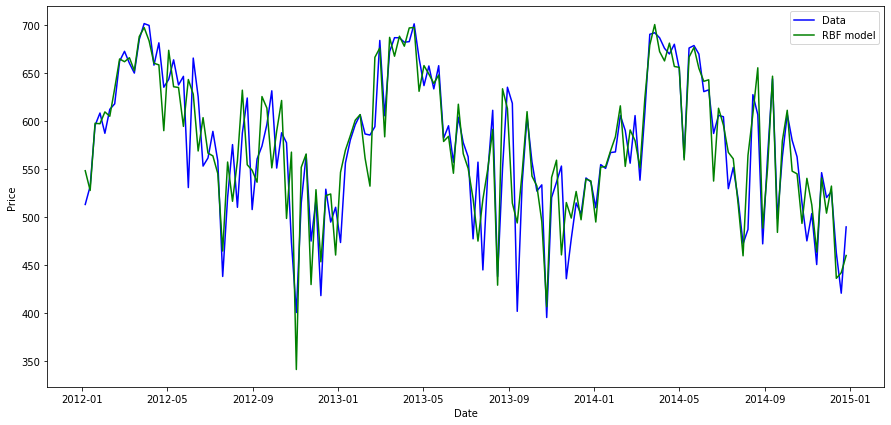

In [20]:
plt.figure(figsize = (15,7))
plt.plot(y_w[626:-1].index, y_w[626:-1], color= 'blue', label= 'Data')
plt.plot(y_w[626:-1].index,np.asarray(yhat).reshape(156,) , color= 'green', label= 'RBF model') 
plt.xlabel('Date')
plt.ylabel('Price')
plt.legend()
plt.show()

In [21]:
df1 = pd.DataFrame(columns=['Date','GHI'])
df1['Date'] = y_w[626:-1].index
df1['GHI'] = np.asarray(yhat).reshape(156,)
df1.to_csv('/content/gdrive/My Drive/BITS/4-2/ASM_sop/Code/AndhraPradesh1/LSTMweekly.csv')

In [22]:
from sklearn.metrics import mean_squared_error
mean_squared_error(y_w[626:-1],np.asarray(yhat).reshape(156,),squared=False)

35.08868709748918

In [23]:
from sklearn.metrics import mean_absolute_percentage_error
mean_absolute_percentage_error(y_w[626:-1],np.asarray(yhat).reshape(156,))

0.04603794532371063